## Introduction
Statistical learning refers to a large collection of tools that are used for understanding data. Statistical learning can be divided into two categories which are called supervised learning and unsupervised learning.
### Supervised Learning
In Supervised learning the dataset contains both input and it's output, which means the out of given input data is known. Typically, the output need to be provided by a person or by another algorithm, that's it's called supervised learning. In supervised learning if the output is quantitative we call it regression problem. If the output is qualitative we call it Classification problem. Throughout the tutorial we will work with regression problem.

A linear regression typically looks like this: $$y = {\beta}_0 + x{\beta}_1$$
where x is the input and y the output of given x. Beta_0 is randomly initialized and beta_1 comes from the given x [coefficient varience].
In the following we will try to generate x and y

### Generating Example Regression data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
n = 100 # number of observation
beta_0 = 5
beta_1 = 3
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 *x + ss.norm.rvs(loc=0, scale=1, size=n)

Text(0,0.5,'y')

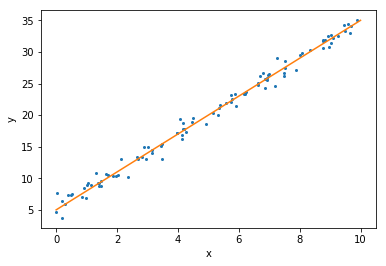

In [3]:
# Let's plot our generated data
plt.figure()
plt.plot(x,y, "o", ms=2)
xx =np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

The orange line, the straight line here, is the function [beta_0 + beta_1 * xx] that we used to generate the data from. The blue dots here correspond to realizations from this model.
So what we did was we first sampled 100 points from the interval 0 toto 10. Then we computed the corresponding y values. And then we added a little bit of normally distributed or Gaussian noise all of those points. And that's why the points are being scattered around the line.

### Residual Sum Square [RSS]
The residual for the ${i}-th$ observation is
going to be given by the data point $yi$ subtract from our predicted value
for that same data point.  which is as follows:
$$e = y - \hat{y}$$
So e sub i here is the difference between the i-th
observed response value and the i-th response value predicted by the model. Now look below how we can compute the RSS in code. 

### Least Square Estimation in Code

In [4]:
rss = []
slopes = np.arange(-10, 15, 0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2 ))
    
ind_min = np.argmin(rss)
print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  2.999999999999723


Text(0,0.5,'RSS')

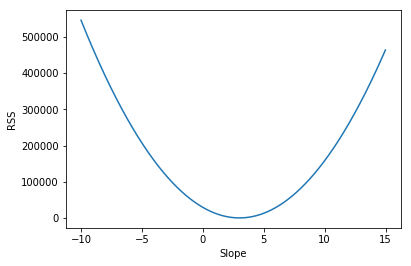

In [5]:
# Plotting RSS
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

Here in the figure on the x-axis, we have the different slopes that we tried out from -10 to 15. On the y-axis, we have the different rss values. The goal is to find the value of slope, the value of the parameter that gives us the smallest value for RSS. And looking at the plot, it looks like it happens at around 3. If we go back to our Python code, we'll see that our estimate was exactly 3.0 in this case.


## Simple Linear Regression 

Now that we have our x and y values. We can create a siimple linear regression model using statsmodels.api library.
First we will try to create the model without intializing constant value, which is ${\beta}_0 , {\beta}$. As you can see from the output
the standard error is 0.051 without constant. 

In [6]:
import statsmodels.api as sm

mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5523.
Date:                Sat, 05 Jan 2019   Prob (F-statistic):           1.17e-88
Time:                        20:09:22   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7569      0.051     74.320      0.0

In [7]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9359.
Date:                Sat, 05 Jan 2019   Prob (F-statistic):           4.64e-99
Time:                        20:09:22   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

We added constant value and the standard error is now 0.031. Which is much smaller than before. That means model works better
by initilizing beta_0 [ constant vlaue ]

## Multiple Linear Regression

A multiple regression model with two inputs. The model predictions for the output  are given by $y$
$$\hat{y} = \hat{\beta}_0 + x_1\hat{\beta}_1 + x_2\hat{\beta}_2$$

### Generating data

In [8]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

X = np.stack([x_1, x_2], axis=1)


To construct a capital X variable, the idea here is to take our x1 variable and our x2 variableand stack them as columns into a capital X variable, turning it into a matrix. So we can do this by using the np.stack function.
So our input consists of a list (x1, x2) where we specify the vectors, or arrays, that we would like to stack. Then we also have to specify the axis. Remember this starts from 0. And because we would like exponent x to be columns in this matrix,
we will use axis equals 1.

### Ploting out data in 3D

Text(0.5,0,'$y$')

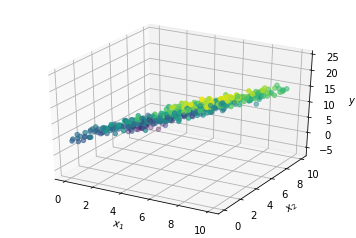

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

### Building our Linear Regression Model using Scikit Learn

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Evaluating Model

In [11]:
X_0 = np.array([2,4])
print("The predicted value is: ",lm.predict(X_0.reshape(1,-1)))
print("The accuracy is: ",lm.score(X, y))

The predicted value is:  [5.07289561]
The accuracy is:  0.9798997316600129


### Assessing Model Accuracy
We can evaluate our model by spliting our data into two sets. One set is for training and another set is for testing. By using scikit learn library we can do it easily.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, random_state=1)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

print("Accuracy in test set: ",lm.score(X_test, y_test))

Accuracy in test set:  0.9794930834681773


C:\Users\ICT_H\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
